<a href="https://colab.research.google.com/github/yash-web/Trnasformer-Bert/blob/main/Convolutional_Neural_Networks_Step_by_Step__week1_assigment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


Exercise: Implement the following function, which pads all the images of a batch of examples X with zeros. Use np.pad. Note if you want to pad the array "a" of shape
 with pad = 1 for the 2nd dimension, pad = 3 for the 4th dimension and pad = 0 for the rest, you would do:

a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))


In [12]:
def padding(x):

  return np.pad(x, ((1,1), (0,0), (1,1),(1,1)), mode='constant', constant_values = (0,0))


In [14]:
def zero_pad(X, pad):


    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0,0), (pad, pad), (pad, pad), (0,0)), mode='constant', constant_values = (0,0))
    ### END CODE HERE ###

    return X_pad

In [15]:
print(x.shape)

(6, 3, 5, 4)


x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


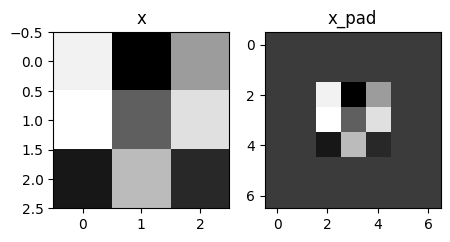

In [16]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit, which:

Takes an input volume
Applies a filter at every position of the input
Outputs another volume (usually of different size)

In a computer vision application, each value in the matrix on the left corresponds to a single pixel value, and we convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a bias. In this first step of the exercise, you will implement a single step of convolution, corresponding to applying a filter to just one of the positions to get a single real-valued output.

Later in this notebook, you'll apply this function to multiple positions of the input to implement the full convolutional operation.

Exercise: Implement conv_single_step(). Hint.

Note: The variable b will be passed in as a numpy array. If we add a scalar (a float or integer) to a numpy array, the result is a numpy array. In the special case when a numpy array contains a single value, we can cast it as a float to convert it to a scalar.


In [31]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
    of the previous layer.

    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
    s = np.multiply(a_slice_prev, W)
    # print(s)
    # Z=np.sum(s)
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    ### END CODE HERE ###

    return Z

In [28]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)
# print(W)
# print("====")
# print(b)
Z = conv_single_step(a_slice_prev, W, b)
print("Z0 =", Z)

[[[ 0.12015895  0.61720311  0.30017032]
  [-0.35224985 -1.1425182  -0.34934272]
  [-0.20889423  0.58662319  0.83898341]
  [ 0.93110208  0.28558733  0.88514116]]

 [[-0.75439794  1.25286816  0.51292982]
  [-0.29809284  0.48851815 -0.07557171]
  [ 1.13162939  1.51981682  2.18557541]
  [-1.39649634 -1.44411381 -0.50446586]]

 [[ 0.16003707  0.87616892  0.31563495]
  [-2.02220122 -0.30620401  0.82797464]
  [ 0.23009474  0.76201118 -0.22232814]
  [-0.20075807  0.18656139  0.41005165]]

 [[ 0.19829972  0.11900865 -0.67066229]
  [ 0.37756379  0.12182127  1.12948391]
  [ 1.19891788  0.18515642 -0.37528495]
  [-0.63873041  0.42349435  0.07734007]]]
====
[[[-0.34385368]]]
[[[ 0.19517964 -0.37757796 -0.15854148]
  [ 0.37795303 -0.98874397  0.80402579]
  [-0.36448112 -0.44654162  0.26766851]
  [-0.23218928  0.41755949 -1.82351535]]

 [[ 0.24323087 -0.48116947  0.58154416]
  [ 0.32786971 -0.08423431  0.06634126]
  [ 0.04777032  0.88577236 -2.40548621]
  [-1.59860247 -1.30199961 -0.25349124]]

 [[ 0

3.3 - Convolutional Neural Networks - Forward pass
In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

Exercise: Implement the function below to convolve the filters W on an input activation A_prev.
This function takes the following inputs:

A_prev, the activations output by the previous layer (for a batch of m inputs);
Weights are denoted by W. The filter window size is f by f.
The bias vector is b, where each filter has its own (single) bias.
Finally you also have access to the hyperparameters dictionary which contains the stride and the padding.

Hint:

To select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (5,5,3)), you would do:
a_slice_prev = a_prev[0:2,0:2,:]
Notice how this gives a 3D slice that has height 2, width 2, and depth 3. Depth is the number of channels.
This will be useful when you will define a_slice_prev below, using the start/end indexes you will define. 2. To define a_slice you will need to first define its corners vert_start, vert_end, horiz_start and horiz_end. This figure may be helpful for you to find out how each of the corner can be defined using h, w, f and s in the code below.

In [29]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """

    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape[0], A_prev.shape[1], A_prev.shape[2], A_prev.shape[3]

    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape[0], W.shape[1], W.shape[2], W.shape[3]

    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    pad = hparameters["pad"]

    # Compute the dimensions of the CONV output volume using the formula given above.
    # Hint: use int() to apply the 'floor' operation. (≈2 lines)
    n_H = int(int(n_H_prev + 2*pad - f)/stride + 1)
    n_W = int(int(n_W_prev + 2*pad - f)/stride + 1)

    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros([m, n_H, n_W, n_C])

    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):                  # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]      # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = stride * h
            vert_end = vert_start + f

            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" (≈2 lines)
                horiz_start = stride * w
                horiz_end = horiz_start + f

                for c in range(n_C):   # loop over channels (= #filters) of the output volume

                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = A_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :]

                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    weights = W[:, :, :, c]
                    biases = b[:, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)

    ### END CODE HERE ###

    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))

    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)

    return Z, cache

In [30]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Streaming output truncated to the last 5000 lines.
  [-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00]]

 [[-3.94002715e+00 -3.43993568e-01  2.10408026e-01  1.43881926e-02]
  [-1.51059153e+00  4.35071619e-01  1.15727220e-03 -9.39248265e-03]
  [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-5.39943421e-01  5.06062155e-01 -1.70911132e+00 -8.17813467e-05]
  [-1.76404608e-01  3.28162285e-01 -5.61767175e-01  7.49507295e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]]
[[[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00]
  [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]]

 [[ 2.86887594e+00 -1.35688518e+00 -6.64148464e-02  7.10749049e-03]
  [ 2.94547244e+00  4.45939677e-01  5.87821695e-02 -5.55011447e-03]
  [-0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.000

For this exercise, we won't worry about vectorization, and will just implement everything with for-loops.

Additional Hints if you're stuck
You will want to use array slicing (e.g.varname[0:1,:,3:5]) for the following variables:
a_prev_pad ,W, b
Copy the starter code of the function and run it outside of the defined function, in separate cells.
Check that the subset of each array is the size and dimension that you're expecting.
To decide how to get the vert_start, vert_end; horiz_start, horiz_end, remember that these are indices of the previous layer.
Draw an example of a previous padded layer (8 x 8, for instance), and the current (output layer) (2 x 2, for instance).
The output layer's indices are denoted by h and w.
Make sure that a_slice_prev has a height, width and depth.
Remember that a_prev_pad is a subset of A_prev_pad.
Think about which one should be used within the for loops.

In [32]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters
    """

    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### START CODE HERE ###
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = stride * h
            vert_end = vert_start + f

            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = stride * w
                horiz_end = horiz_start + f

                for c in range (n_C):            # loop over the channels of the output volume

                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i]

                    # Compute the pooling operation on the slice.
                    # Use an if statement to differentiate the modes.
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice[vert_start:vert_end, horiz_start:horiz_end, c])
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice[vert_start:vert_end, horiz_start:horiz_end, c])

    ### END CODE HERE ###

    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)

    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))

    return A, cache

In [33]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

In [34]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function

    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()

    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    cache = (A_prev, hparameters)
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache

    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape

    # Retrieve information from "hparameters"
    stride = hparameters["stride"]
    pad = hparameters["pad"]

    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ

    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = 0
    dW = 0
    db = 0

    # Pad A_prev and dA_prev
    A_prev_pad = pad
    dA_prev_pad = pad

    for i in range(m):                       # loop over the training examples

        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = None
        da_prev_pad = None

        for h in range(None):                   # loop over vertical axis of the output volume
            for w in range(None):               # loop over horizontal axis of the output volume
                for c in range(None):           # loop over the channels of the output volume

                    # Find the corners of the current "slice"
                    vert_start = None
                    vert_end = None
                    horiz_start = None
                    horiz_end = None

                    # Use the corners to define the slice from a_prev_pad
                    a_slice = None

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += None
                    dW[:,:,:,c] += None
                    db[:,:,:,c] += None

        # Set the ith training example's dA_prev to the unpadded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = None
    ### END CODE HERE ###

    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))

    return dA_prev, dW, db
# We'll run conv_forward to initialize the 'Z' and 'cache_conv",
# which we'll use to test the conv_backward function


In [35]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

# Test conv_backward
# dA, dW, db = conv_backward(Z, cache_conv)
# print("dA_mean =", np.mean(dA))
# print("dW_mean =", np.mean(dW))
# print("db_mean =", np.mean(db))

In [38]:
print(len(cache_conv))

4
